<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-125/blob/main/Actividad_Semanal_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Datos generales

Actividad Semanal - 4

Estefania Abigail Castro Belmont A01332636

Ciencia y analítica de datos

Jobish

11/10/2022

#Parte 1: Ejercicio guiado 

##Paso 1

Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

###Importando datos del ejercicio anterior

In [1]:
#importamos librerías
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing

In [2]:
#leemos el ejercicio que realizamos la útlima ocasión
df= pd.read_csv("/content/ndf (1)")

In [3]:
#Lo convertimos en DataFrame
df=pd.DataFrame(df)
df

,Unnamed: 0,ID,X1,X2,X3,X4,X5,X6,X7,X8,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29986,29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29987,29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29988,29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29989,29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


###Explotamos el dataset

In [4]:
#Vemos las filas y columnas que tiene
df.shape

(29991, 26)

In [5]:
#Nos centramos en dos variables para ver su comportamiento
ndf=df[["X9","X10"]]
ndf.corr()

,X9,X10
X9,1.000000,0.819992
X10,0.819992,1.000000


In [6]:
#Checamos el promedio
for col in ndf:
  print("Promedio de", col, ndf[col].mean().round(2))

Promedio de X9 -0.22
Promedio de X10 -0.27


In [7]:
#Checamos la varianza
Varience = np.cov([df.X9, df.X10])
Varience

array([[1.36689919, 1.08630907],
       [1.08630907, 1.28395823]])

In [8]:
#Checamos la suma de varianza
ndf = df[['X9','X10']]
ndf.var().sum()

2.6508574201692543

In [9]:
t= ndf.var().sum()
varC =Varience[0][0]
varR = Varience[1][1]

In [10]:
print('Total Varience \t\t\t:', t.round(2) )
print('Varience prop. of Calory \t:', ((varC/t)*100).round(2),'%' )
print('Varience prop. of Rating \t:', ((varR/t)*100).round(2),'%' )

Total Varience 			: 2.65
Varience prop. of Calory 	: 51.56 %
Varience prop. of Rating 	: 48.44 %


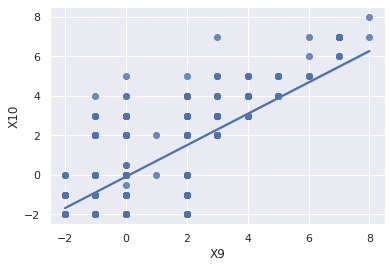

In [11]:
p = sns.regplot(data = df,  
                x = df.X9, 
                y = df.X10
               ) 
p

In [12]:
pcs = PCA(n_components=2)

pcs.fit(df[['X9', 'X10']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,1.553232,0.910094,0.910094
1,0.488189,0.089906,1.000000


In [13]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1
Standard deviation,1.55,0.49
Proportion of variance,0.91,0.09
Cumulative proportion,0.91,1.00


In [14]:
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary = pcsSummary.round(4)
pcsSummary

,PC1,PC2
Standard deviation,1.5532,0.4882
Proportion of variance,0.9101,0.0899
Cumulative proportion,0.9101,1.0000


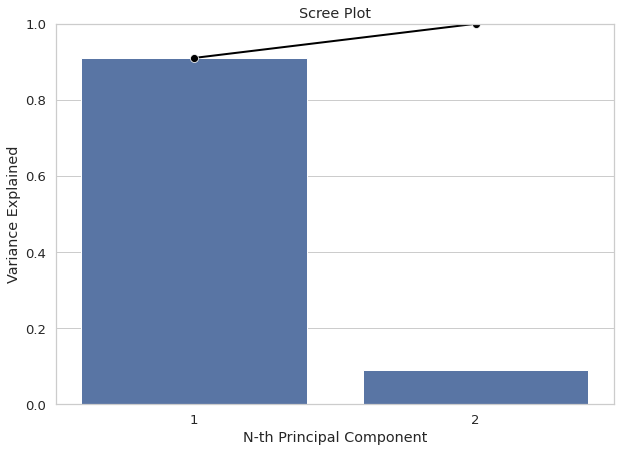

In [15]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [16]:
pcs.components_.round(4)

array([[ 0.7205,  0.6935],
       [-0.6935,  0.7205]])

In [17]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1', 'PC2'],
                                index=['X9', 'X10']
                                )
pcsComponents_df

,PC1,PC2
X9,0.720468,-0.693488
X10,0.693488,0.720468


In [18]:
scores = pd.DataFrame(pcs.transform(df[['X9', 'X10']]),
                      columns=['x', 'y']
                      )
scores.head()

,x,y
0,-1.763670,-0.708640
1,0.343775,0.038807
2,0.343775,0.038807
3,0.343775,0.038807
4,0.343775,0.038807


In [19]:
df.X9.var() + df.X10.var()

2.6508574201692543

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29991 entries, 0 to 29990
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  29991 non-null  int64  
 1   ID          29991 non-null  int64  
 2   X1          29991 non-null  int64  
 3   X2          29991 non-null  float64
 4   X3          29991 non-null  float64
 5   X4          29991 non-null  float64
 6   X5          29991 non-null  float64
 7   X6          29991 non-null  float64
 8   X7          29991 non-null  float64
 9   X8          29991 non-null  float64
 10  X9          29991 non-null  float64
 11  X10         29991 non-null  float64
 12  X11         29991 non-null  float64
 13  X12         29991 non-null  float64
 14  X13         29991 non-null  float64
 15  X14         29991 non-null  float64
 16  X15         29991 non-null  float64
 17  X16         29991 non-null  float64
 18  X17         29991 non-null  float64
 19  X18         29991 non-nul

###Trabajando los datos para implementar el PCA

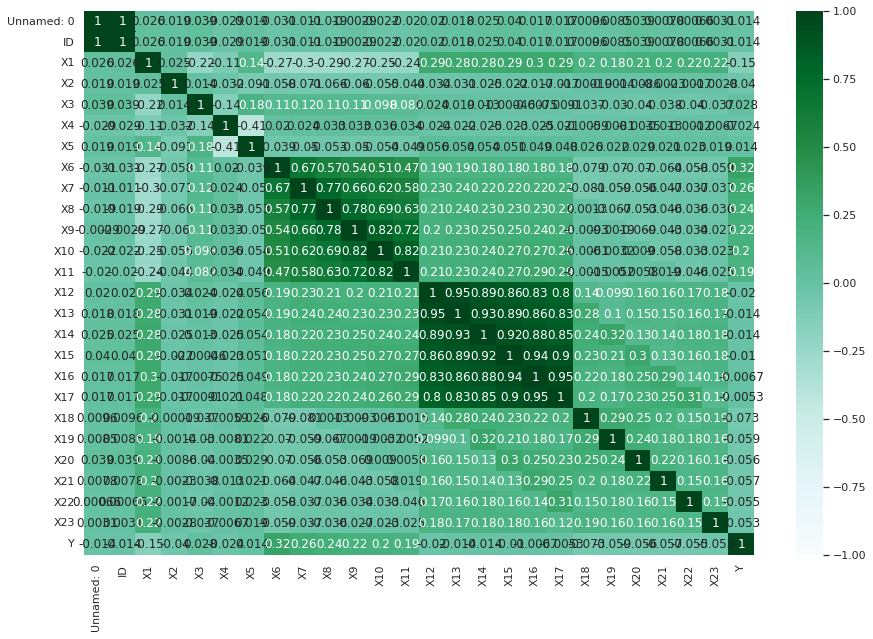

In [21]:
import seaborn as singular_values_
correlacion = df.corr()

sns.set(rc= {"figure.figsize":(15,10)})
sns.heatmap(correlacion, vmin = -1, vmax = 1, cmap = "BuGn", annot = True)

In [22]:
df=df.drop(columns=['Unnamed: 0', 'ID'])
df.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
X1,1.000000,0.024728,-0.219210,-0.108150,0.144590,-0.271077,-0.296293,-0.286329,-0.267321,-0.249432,...,0.294055,0.295608,0.290451,0.195302,0.178430,0.210140,0.203273,0.217173,0.219619,-0.153679
X2,0.024728,1.000000,0.014345,-0.031693,-0.090739,-0.057750,-0.070913,-0.066045,-0.060103,-0.054925,...,-0.022006,-0.017183,-0.016890,-0.000189,-0.001442,-0.008589,-0.002270,-0.001700,-0.002843,-0.039841
X3,-0.219210,0.014345,1.000000,-0.143347,0.175062,0.105399,0.121669,0.114132,0.108874,0.097611,...,-0.000460,-0.007532,-0.009068,-0.037466,-0.030026,-0.039945,-0.038255,-0.040342,-0.037180,0.028023
X4,-0.108150,-0.031693,-0.143347,1.000000,-0.414079,0.019903,0.024145,0.032723,0.033088,0.035595,...,-0.023403,-0.025500,-0.021314,-0.005913,-0.008121,-0.003515,-0.012671,-0.001209,-0.006690,-0.024194
X5,0.144590,-0.090739,0.175062,-0.414079,1.000000,-0.039459,-0.050157,-0.053195,-0.049750,-0.053859,...,0.051392,0.049394,0.047708,0.025952,0.021775,0.029217,0.021359,0.022741,0.019496,0.013705
X6,-0.271077,-0.057750,0.105399,0.019903,-0.039459,1.000000,0.672075,0.574385,0.538895,0.509325,...,0.179150,0.180680,0.177023,-0.079246,-0.070104,-0.070467,-0.063986,-0.058145,-0.058674,0.324742
X7,-0.296293,-0.070913,0.121669,0.024145,-0.050157,0.672075,1.000000,0.766743,0.662131,0.622813,...,0.222270,0.221355,0.219406,-0.080690,-0.058990,-0.055817,-0.046844,-0.037056,-0.036501,0.263560
X8,-0.286329,-0.066045,0.114132,0.032723,-0.053195,0.574385,0.766743,1.000000,0.777459,0.686795,...,0.227353,0.225294,0.222465,0.001296,-0.066781,-0.053265,-0.046025,-0.035838,-0.035834,0.235218
X9,-0.267321,-0.060103,0.108874,0.033088,-0.049750,0.538895,0.662131,0.777459,1.000000,0.819992,...,0.245990,0.242975,0.239202,-0.009332,-0.001925,-0.069182,-0.043422,-0.033648,-0.026545,0.216414
X10,-0.249432,-0.054925,0.097611,0.035595,-0.053859,0.509325,0.622813,0.686795,0.819992,1.000000,...,0.271853,0.269716,0.262429,-0.006081,-0.003188,0.009042,-0.058253,-0.033356,-0.022998,0.203935


In [23]:
pcs = PCA()
pcs.fit(df.iloc[:, 3:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Standard deviation,155784.418792,37322.450025,27831.239059,21432.128690,20304.936334,18514.555370,17032.028711,16319.255788,11618.339549,10431.499564,...,8198.379137,9.203200e+00,2.255399e+00,9.434205e-01,7.333574e-01,5.970295e-01,5.121134e-01,4.749250e-01,4.185844e-01,3.861753e-01
Proportion of variance,0.848698,0.048713,0.027088,0.016063,0.014418,0.011988,0.010145,0.009313,0.004721,0.003805,...,0.002351,2.961986e-09,1.778902e-10,3.112547e-11,1.880774e-11,1.246513e-11,9.171442e-12,7.887789e-12,6.127331e-12,5.215240e-12
Cumulative proportion,0.848698,0.897411,0.924499,0.940562,0.954980,0.966968,0.977113,0.986426,0.991147,0.994952,...,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


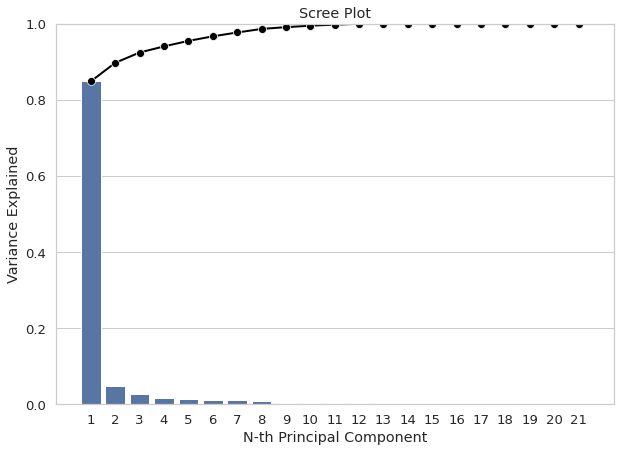

In [24]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [25]:
#Los primeros cinco componentes suman un total del 95% del total de la varianza 
#OR
((pcsSummary_df.iloc[2][4])*100).round(0)
#type(pcsSummary_df)

95.0

In [26]:
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
Standard deviation,155784.4188,37322.4500,27831.2391,21432.1287,20304.9363,18514.5554,17032.0287,16319.2558,11618.3395,10431.4996,...,8198.3791,9.2032,2.2554,0.9434,0.7334,0.597,0.5121,0.4749,0.4186,0.3862
Proportion of variance,0.8487,0.0487,0.0271,0.0161,0.0144,0.0120,0.0101,0.0093,0.0047,0.0038,...,0.0024,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000
Cumulative proportion,0.8487,0.8974,0.9245,0.9406,0.9550,0.9670,0.9771,0.9864,0.9911,0.9950,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000


In [27]:
pcs.components_

array([[-8.24541458e-08,  3.28266096e-06,  1.37306219e-06,
         1.82076894e-06,  1.80108996e-06,  1.81914431e-06,
         1.85104161e-06,  1.91614929e-06,  4.46545477e-01,
         4.40870726e-01,  4.29187783e-01,  3.97483161e-01,
         3.69466271e-01,  3.52660497e-01,  2.49816114e-02,
         2.84011798e-02,  2.38479091e-02,  1.93461715e-02,
         1.90058177e-02,  2.06263522e-02, -3.71418006e-08],
       [-2.67549095e-08, -1.80922238e-06, -1.19175945e-06,
        -1.49730571e-06, -3.81414010e-07,  1.26321136e-06,
         2.66908027e-06,  3.68002112e-06, -5.48965167e-01,
        -3.93818809e-01, -5.03330189e-02,  2.57506308e-01,
         4.24108770e-01,  4.79699821e-01,  4.36259165e-02,
         1.69320855e-01,  1.41884802e-01,  1.00085349e-01,
         6.20353082e-02, -1.23039046e-02,  5.81224321e-08],
       [-6.64249431e-08,  3.62831841e-06, -3.94863187e-06,
        -4.20117987e-06, -3.32026026e-06, -1.27983673e-06,
        -2.27250103e-06, -3.58310979e-06, -1.90241639e

In [28]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df.iloc[:, 3:].columns
                                )
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
X4,-8.245415e-08,-2.675491e-08,-6.642494e-08,-2.809709e-08,-2.040277e-08
X5,3.282661e-06,-1.809222e-06,3.628318e-06,1.064860e-05,-1.806172e-06
X6,1.373062e-06,-1.191759e-06,-3.948632e-06,-8.175036e-06,1.921401e-06
X7,1.820769e-06,-1.497306e-06,-4.201180e-06,-7.862468e-06,2.305931e-06
X8,1.801090e-06,-3.814140e-07,-3.320260e-06,-8.954405e-06,8.170829e-07
X9,1.819144e-06,1.263211e-06,-1.279837e-06,-9.815922e-06,2.000380e-06
X10,1.851042e-06,2.669080e-06,-2.272501e-06,-8.515071e-06,-1.242748e-06
X11,1.916149e-06,3.680021e-06,-3.583110e-06,-6.823683e-06,8.524968e-07
X12,4.465455e-01,-5.489652e-01,-1.902416e-01,3.136766e-01,7.871472e-02
X13,4.408707e-01,-3.938188e-01,-3.578148e-02,2.858113e-02,-7.561491e-02


In [29]:
pcs_final=pcsComponents_df.iloc[:,:5]

In [30]:
pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df.iloc[:, 3:].columns
                                )
pcsComponents_dfX

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
X4,-8.245415e-08,-2.675491e-08,-6.642494e-08,-2.809709e-08,-2.040277e-08,1.463321e-07,-3.791138e-07,-5.594973e-08,1.651355e-07,3.436084e-07,...,3.189100e-07,-2.351370e-02,0.003050,9.776555e-03,-2.197099e-03,6.877519e-03,-4.271535e-02,9.970982e-01,-7.512452e-03,-5.660682e-02
X5,3.282661e-06,-1.809222e-06,3.628318e-06,1.064860e-05,-1.806172e-06,-1.184240e-06,-2.479384e-06,2.196127e-06,-4.049053e-06,-2.542191e-06,...,-5.616576e-06,9.995444e-01,0.018904,8.041948e-04,1.914925e-04,-4.572047e-04,-1.041127e-03,2.348069e-02,-5.437687e-04,3.547337e-04
X6,1.373062e-06,-1.191759e-06,-3.948632e-06,-8.175036e-06,1.921401e-06,-1.870309e-06,8.963992e-07,3.212742e-07,3.406097e-06,4.387585e-06,...,5.280249e-07,-5.858887e-03,0.335629,-6.249959e-01,-6.196775e-01,2.782986e-01,-1.400943e-01,2.457287e-03,-2.404635e-02,1.226284e-01
X7,1.820769e-06,-1.497306e-06,-4.201180e-06,-7.862468e-06,2.305931e-06,-2.733112e-06,8.266102e-07,-5.829166e-07,2.588810e-06,5.542009e-06,...,1.692138e-06,-8.094171e-03,0.422617,-4.257791e-01,2.922944e-01,-5.791988e-01,4.542518e-01,2.785680e-02,1.095234e-01,4.251248e-03
X8,1.801090e-06,-3.814140e-07,-3.320260e-06,-8.954405e-06,8.170829e-07,3.541613e-06,2.661527e-07,-4.994436e-07,1.693914e-06,4.258789e-06,...,1.328908e-06,-8.447522e-03,0.441397,-1.049570e-01,5.662267e-01,1.486378e-01,-6.216795e-01,-2.761587e-02,-2.523268e-01,2.141247e-02
X9,1.819144e-06,1.263211e-06,-1.279837e-06,-9.815922e-06,2.000380e-06,7.717663e-07,1.377432e-06,-1.468456e-06,3.581010e-06,8.123362e-07,...,3.364140e-06,-7.792854e-03,0.435826,2.419102e-01,1.532107e-01,5.758848e-01,3.266877e-01,9.701296e-03,5.378927e-01,-1.449889e-02
X10,1.851042e-06,2.669080e-06,-2.272501e-06,-8.515071e-06,-1.242748e-06,-8.979370e-07,-5.614988e-07,-6.693983e-07,5.431747e-06,2.963711e-06,...,-7.362999e-07,-8.179927e-03,0.411260,3.934143e-01,-1.985674e-01,4.839820e-02,3.476415e-01,4.693686e-03,-7.161493e-01,2.247999e-02
X11,1.916149e-06,3.680021e-06,-3.583110e-06,-6.823683e-06,8.524968e-07,7.642573e-09,3.292691e-06,1.265697e-06,4.953253e-06,4.303711e-06,...,2.550889e-06,-7.667287e-03,0.389503,4.441114e-01,-3.776048e-01,-4.795480e-01,-3.971611e-01,-1.811321e-02,3.468591e-01,-8.123628e-03
X12,4.465455e-01,-5.489652e-01,-1.902416e-01,3.136766e-01,7.871472e-02,-4.581569e-01,8.320887e-03,7.772474e-02,1.710437e-01,-2.670682e-01,...,-4.713574e-03,-7.649846e-06,0.000005,1.979299e-06,7.912143e-07,1.192228e-06,-1.339184e-06,-7.694674e-08,-2.641442e-07,-6.493924e-07
X13,4.408707e-01,-3.938188e-01,-3.578148e-02,2.858113e-02,-7.561491e-02,5.263720e-01,-6.470946e-02,1.034898e-01,1.229801e-02,3.512837e-01,...,1.528004e-02,3.260528e-06,-0.000005,2.581259e-06,-1.756781e-06,-2.162108e-07,1.047322e-06,-2.714881e-07,3.220389e-07,1.454190e-07


###Normalización

In [31]:
pcs_final=df.copy()
pcs_final=pd.DataFrame(pcs_final)
pcs_final.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [32]:
pcs_final=pcs_final.drop(columns=["Y"])
pcs_final

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29986,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29987,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29988,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29989,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


###PCA

In [33]:
pcs = PCA()
pcs.fit(preprocessing.scale(pcs_final.iloc[:, 3:].dropna(axis=0))) 

PCA()

In [34]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Standard deviation,2.5522,1.9307,1.2305,1.1789,0.9567,0.9424,0.9339,0.8849,0.8560,0.8271,0.7644,0.6359,0.5104,0.5004,0.4344,0.3630,0.2650,0.2023,0.1591,0.1524
Proportion of variance,0.3257,0.1864,0.0757,0.0695,0.0458,0.0444,0.0436,0.0392,0.0366,0.0342,0.0292,0.0202,0.0130,0.0125,0.0094,0.0066,0.0035,0.0020,0.0013,0.0012
Cumulative proportion,0.3257,0.5120,0.5877,0.6572,0.7030,0.7474,0.7910,0.8302,0.8668,0.9010,0.9302,0.9505,0.9635,0.9760,0.9854,0.9920,0.9955,0.9976,0.9988,1.0000


In [35]:
pcsSummary_df.iloc[2,11]

0.9504529420542553

##Paso 2
Interprete cada componente principal en términos de las variables originales

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

In [40]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=pcs_final.iloc[:,:20].columns
 #                               index=pcs_final.iloc[:, 3:].columns
                                )
pcsComponents_df.iloc[:,:12]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
X1,-0.003316,-0.043856,0.190016,-0.683168,0.004030,-0.003969,0.005972,0.021701,-0.016404,-0.008955,0.702949,0.001605
X2,0.010697,0.070468,-0.185301,0.675185,-0.006311,-0.005766,0.013715,0.027300,-0.023556,-0.029485,0.708503,0.001597
X3,0.168724,-0.306741,-0.017590,0.028913,-0.094528,0.008176,-0.020991,0.003153,0.048141,0.641880,0.028393,-0.608933
X4,0.202671,-0.344470,0.029025,0.039670,-0.108483,0.004481,-0.026535,0.006211,0.030179,0.390706,0.008050,0.320777
X5,0.208937,-0.356113,0.082521,0.049809,-0.042545,-0.024056,-0.016619,-0.024587,-0.106844,0.109144,0.005850,0.541094
X6,0.215644,-0.358670,0.117142,0.060904,0.010394,-0.044151,0.027849,-0.056667,-0.009475,-0.211366,0.007036,0.173290
X7,0.219229,-0.345364,0.137194,0.058623,0.064283,-0.010739,0.033223,0.067427,0.007768,-0.368078,-0.008694,-0.175608
X8,0.214231,-0.317365,0.136973,0.055595,0.079594,0.078462,-0.017725,0.015155,0.020683,-0.416499,-0.003633,-0.362632
X9,0.331612,0.164171,-0.208388,-0.073128,-0.053559,-0.030327,-0.059355,0.011370,0.010904,0.046514,0.008070,0.078432
X10,0.343191,0.166035,-0.177683,-0.067044,0.015670,-0.078153,-0.047091,-0.036067,-0.132265,0.041897,0.001816,0.054069



##Paso 3
 Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

In [ ]:
pcsComponents_df.iloc[:,:12].boxplot()

#Parte 2

Responde las siguientes preguntas en una celda de texto en Jupyter Notebook.

###Preguntas

* ¿Cuál es el número de componentes mínimo y por qué?

Optampos por 12 compontentes, ya que con estos se mantiene una variación del 95%

* ¿Cuál es la variación de los datos que representan esos componentes? 


* ¿Cuál es la pérdida de información después de realizar PCA?
* De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

    - Mayor X15
    - Menor X22

* ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

In [ ]:
col = ["PC1","PC2","PC3","PC4","PC5"]
print(pcsComponents_df[col].idxmax())

In [ ]:
print(pcsComponents_df.PC1.nlargest(3))

In [ ]:
col = ["PC1","PC2","PC3","PC4","PC5"]
print(pcsComponents_df[col].idxmin())

In [ ]:
pcsComponents_df.PC5.nsmallest(3)

In [ ]:
pcsComponents_df.PC1.var() + pcsComponents_df.PC2.var()+ pcsComponents_df.PC3.var()+ pcsComponents_df.PC4.var()+ pcsComponents_df.PC5.var()+ pcsComponents_df.PC6.var()+ pcsComponents_df.PC7.var()+pcsComponents_df.PC8.var() + pcsComponents_df.PC9.var()+ pcsComponents_df.PC10.var()+ pcsComponents_df.PC11.var()+ pcsComponents_df.PC12.var()

In [ ]:
#var=[]
var=0
for col in pcsComponents_df:
  var=var+pcsComponents_df[col].var()
#  var.append(pcsComponents_df[col].var())
  

In [ ]:
var

###Ejercicio medio resuelto

In [ ]:
summary = {
    "Varianza": df.var(),
    "Mínimo": df.min(),
    "Máximo": df.max()
}
pd.DataFrame(summary).transpose()

In [ ]:
#Buscamos la varianza total de todas las variables
total_var = df.var().sum()

In [ ]:
#Calculamos la varianza para cada variable que estamos estudiando
var_x1 = df.X1.var()
var_x2 = df.X2.var()
var_x3 = df.X3.var()
var_x4 = df.X4.var()
var_x5 = df.X5.var()
var_x6 = df.X6.var()
var_x7 = df.X7.var()
var_x8 = df.X8.var()
var_x9 = df.X9.var()
var_x10 = df.X10.var()
var_x11 = df.X11.var()
var_x12 = df.X12.var()
var_x13 = df.X13.var()
var_x14 = df.X14.var()
var_x15 = df.X15.var()
var_x16 = df.X16.var()
var_x17 = df.X17.var()
var_x18 = df.X18.var()
var_x19 = df.X19.var()
var_x20 = df.X20.var()
var_x21 = df.X21.var()
var_x22 = df.X22.var()
var_x23 = df.X23.var()
var_Y = df.Y.var()

In [ ]:
#Sacamos el % que representa la varianza de cada variable respecto al total.
print('Varianza Total \t:',total_var.round(2) )
print('Varianza X1 \t:', ((var_x1/total_var)*100).round(2),'%' )
print('Varianza X2 \t:', ((var_x2/total_var)*100).round(2),'%' )
print('Varianza X3 \t:', ((var_x3/total_var)*100).round(2),'%' )
print('Varianza X4 \t:', ((var_x4/total_var)*100).round(2),'%' )
print('Varianza X5 \t:', ((var_x5/total_var)*100).round(2),'%' )
print('Varianza X6 \t:', ((var_x6/total_var)*100).round(2),'%' )
print('Varianza X7 \t:', ((var_x7/total_var)*100).round(2),'%' )
print('Varianza X8 \t:', ((var_x8/total_var)*100).round(2),'%' )
print('Varianza X9 \t:', ((var_x9/total_var)*100).round(2),'%' )
print('Varianza X10 \t:',((var_x10/total_var)*100).round(2),'%' )
print('Varianza X11 \t:', ((var_x11/total_var)*100).round(2),'%' )
print('Varianza X12 \t:', ((var_x12/total_var)*100).round(2),'%' )
print('Varianza X13 \t:', ((var_x13/total_var)*100).round(2),'%' )
print('Varianza X14 \t:', ((var_x14/total_var)*100).round(2),'%' )
print('Varianza X15 \t:', ((var_x15/total_var)*100).round(2),'%' )
print('Varianza X16 \t:', ((var_x16/total_var)*100).round(2),'%' )
print('Varianza X17 \t:', ((var_x17/total_var)*100).round(2),'%' )
print('Varianza X18 \t:', ((var_x18/total_var)*100).round(2),'%' )
print('Varianza X19 \t:', ((var_x19/total_var)*100).round(2),'%' )
print('Varianza X20 \t:',((var_x20/total_var)*100).round(2),'%' )
print('Varianza X21 \t:', ((var_x21/total_var)*100).round(2),'%' )
print('Varianza X22 \t:', ((var_x22/total_var)*100).round(2),'%' )
print('Varianza X23 \t:', ((var_x23/total_var)*100).round(2),'%' )
print('Varianza Y \t:', ((var_Y/total_var)*100).round(2),'%' )

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
#Son muchos valores. Así que imprimamos los primeros 5 resultados mejor.
scaled[:5]

In [ ]:
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()

In [ ]:
summary = {
"Varianzas": scaled_df.var(),
"Valor Min": scaled_df.min(),
"Valor Max": scaled_df.max()
}
#recuerda que la variable cols la definimos más arriba.
pd.DataFrame(summary).transpose()


In [ ]:
from sklearn.decomposition import PCA
pcs = PCA()

#Nota: Recuerda limpiar los valores vacíos de tu conjunto de datos antes de␣ aplicar este paso. De lo contrario, te va a dar un error.
pcs_t = pcs.fit_transform(scaled_df)
#De nuevo, con muchos valores, así que vamos a imprimir los primeros 5 renglones
pcs_t[:5]


In [ ]:
pcsSummary_df = pd.DataFrame({
    '% varianza explicada': np.round(pcs.explained_variance_ratio_,4) * 100,
    '% varianza acumulada': np.cumsum(pcs.explained_variance_ratio_) * 100
})
pcsSummary_df

In [ ]:
pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_df.columns))]
pcsSummary_df.index = pcs_labels
pcsSummary_df

In [ ]:
pcs_df = pd.DataFrame(pcs_t, columns =pcs_labels)
print("Varianza total variables originales: ", scaled_df.var().sum())
print("Varianza total de los componentes  : ", pcs_df.var().sum())

###Actividad en clase

In [ ]:
pcsSummary_df.head(16)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
c = "https://raw.githubusercontent.com/tec03/Datasets/main/datasets/Cartwheeldata.csv"

In [ ]:
df = pd.read_csv(c, index_col = 0)
df.index.name = None
df.head()

In [ ]:
varX = df.Score.to_list()
varX

In [ ]:
#Min max normalización
def normalizacion(x):
  min = np.min(x)
  max = np.max(x)
  rango = max-min
  return [(a-min)/rango for a in x]

In [ ]:
normalizacion(varX)